In [98]:
import matplotlib.pyplot as plt
import pathlib
import math
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

In [99]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [100]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3
    
    kern_size = len(kernel)
    kernel_offset = math.floor(kern_size/2)
    im_height = len(im)
    im_width = len(im[0])
    
    convolution_result = np.zeros((im_height, im_width, 3))
    print(f'Convolution with kernelsize: {kern_size}, and image with size {im_height}x{im_width}')
    
    for i in range(0, im_height):
        for j in range(0, im_width):
            convo_sum_r = 0
            convo_sum_g = 0
            convo_sum_b = 0
            for x in range(-kernel_offset, kernel_offset+1):
                for y in range(-kernel_offset, kernel_offset+1):
                    current_cell_i = i + x
                    current_cell_j = j + y
        
                    if current_cell_i < 0 or current_cell_j < 0 or current_cell_i >= im_height or current_cell_j >= im_width:
                        break
                    
                    convo_sum_r += im[current_cell_i][current_cell_j][0] * kernel[x][y]
                    convo_sum_g += im[current_cell_i][current_cell_j][1] * kernel[x][y]
                    convo_sum_b += im[current_cell_i][current_cell_j][2] * kernel[x][y]
                    
            convolution_result[i][j][0] = max(0, min(1.0, convo_sum_r))
            convolution_result[i][j][1] = max(0, min(1.0, convo_sum_g))
            convolution_result[i][j][2] = max(0, min(1.0, convo_sum_b))                               
    
    return convolution_result

In [101]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

Convolution with kernelsize: 5, and image with size 512x512
Convolution with kernelsize: 3, and image with size 512x512


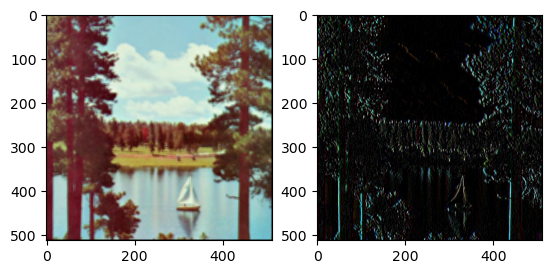

In [102]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()